# Machine Learning 1: Supervised Learning (13.06.2023)
by Thomas Jurczyk (Dr. Eberle Zentrum, Universität Tübingen)

Version: 0.2 (27.03.2023)

In this section of the course, we will delve into the subject of the fundamental principles and techniques of machine learning. While we will only scratch the surface of this vast field, we will learn how to train and apply basic machine learning models in Python.

But before we start, let's define what machine learning is.

> Machine learning is the field of study that gives computers the ability to learn without being explicitly programmed. (Arthur Samuel, 1959)

The above statement is a reference to a quote from the book *Hands-On Machine Learning with Scikit-Learn and TensorFlow* by Aurelien Géron (ISBN: 1491962291), a highly recommended resource for those seeking to learn more about machine learning with Python from an applied perspective.

The field of machine learning is categorized into three main areas:

1. **Supervised learning**
2. **Unsupervised learning**
3. **Reinforcement learning**

In this course, we will concentrate on two of these areas, namely **supervised learning** and **unsupervised learning** (the latter being the subject of the following session).

# What is supervised learning?
Supervised learning involves training a machine learning model using a dataset that already contains the desired labels to be predicted. This type of learning is commonly used for **classification** tasks, which can be binary (e.g., "spam" or "not spam" for emails) or multi-class (e.g., "low," "medium," and "high" for the creditworthiness of a person). If the aim is to predict continuous labels such as housing prices, the process is referred to as **regression**.

For example, suppose we want to analyze Twitter data related to "climate change" and train a machine learning model to predict whether a tweet expresses a critical/affirmative stance towards climate change or a negative/neglecting one. We assume that we already have a previously annotated data set with exemplary tweets which either accept or ignore/downplay climate change, which means that we are confronted with a task situated in the field of supervised learning. In this case, the data we use to train our supervised learning algorithm will contain information like:

| tweet | label |
|:------|:------|
|Climate change is dangerous and we need to stop it!|1|
|The measures against climate change are nonsense. We need to leave the Paris agreement RIGHT NOW!|0|
|I am REALLY desperate. It's getting warmer and warmer every winter...|1|
|....|...|

In this table, the label `1` denotes a critical/affirmative stance towards climate change, whereas `0` indicates a negative/neglecting one.

The initial step is to provide this data, separated into features (`tweet`) and labels (`label`), to our machine learning algorithm. The algorithm will then learn how to predict the correct label based on the input feature (which, in our example, is just text). The approach used by the algorithm to accomplish this depends on the specific learning algorithm, with various techniques suited to different types of data and tasks.

Once our model has been trained on our training dataset, it will provide us with an estimate of how successful the classification is. The most fundamental measure for this is **accuracy**, which indicates the percentage of true positives (i.e., critical tweets) and true negatives (negative/neglecting tweets):

$\frac{T_P + T_N}{N}$

Although accuracy can be a suitable means of assessing the performance of our classifier, it is generally advisable to utilize other metrics as well. This is particularly crucial if our label distribution is biased. For instance, if we have a dataset with 100 entries, of which 99 are labeled "1" and only one is labeled "0," predicting "1" for every entry would result in an accuracy of 99%! However, a model that always predicts "1" is essentially useless.

As a result, it is often recommended to employ additional scores instead. For instance, to assess the performance of a (binary) classifier, a confusion matrix can be used.

## Confusion matrix

Suppose our dataset comprises 23 positive cases (labeled "1") and 18 negative cases (labeled "0"). Our machine learning classifier classifies 19 of the 23 positive cases as "1" (true positives) and 10 of the 18 negative cases as "0" (true negatives), resulting in an accuracy of approximately 70%.

Our confusion matrix would then look like this (EP: estimated positives, EN: estimated negatives):

||**P**|**N**|
|:--:|:---:|:----:|
|**EP**|19|8|
|**EN**|4|10|

These values can be used to compute various estimators of our machine learning model's performance, with two popular metrics being **precision** and **recall**.

### Precision

How accurate is the estimated number of positive cases?

$\frac{T_P}{T_P+F_P}$

$\frac{19}{19+8}=0.7$

(For the negative cases: $\frac{10}{10+4}=0.71$)

### Recall

How many positive cases have been identified?

$\frac{T_P}{T_P+F_N}$

$\frac{19}{19+4}=0.83$

(For the negative cases: $\frac{10}{10+8}=0.55$)

### F<sub>1</sub> score

Both precision and recall are often combined in a single number, the so-called F<sub>1</sub> score.

$\frac{2*Precision*Recall}{Precision+Recall}$

$\frac{2*0.7*0.83}{0.7+0.83}=0.76$

(For the negative cases: $\frac{2*0.7*0.55}{0.7+0.55}=0.56$)

## Train/Test sets
Another prevalent approach is to partition the labeled training dataset into two distinct sets: the train and test sets. The training set, as the name implies, is utilized to train the classifier, while the test set is only used in the final stages of the training process to assess how well the model performs on unfamiliar data. If the model performs exceptionally well on the training set but poorly on the test set, this can indicate **overfitting**, implying that the model is unable to generalize from the data it has been trained on.

It is typical to divide the dataset into **75%** (or 80%) for training and **25%** (or 20%) for testing. Note: Be sure to use stratified sampling to avoid the worst-case scenario of having all positive labels in the test set and all negative labels in the training set.

## Different types of (supervised) machine learning algorithms

There are numerous machine learning algorithms available, and it is often recommended to train multiple models on the same dataset and compare their performance to determine the best one.

There is no one-size-fits-all approach to determining which algorithm to use, as the optimal machine learning algorithm for text classification will be influenced by several factors, including the amount and quality of training data, the complexity of the classification task, and the available computational resources. Some popular algorithms for text classification include **support vector machines**, **decision trees**, and **random forests** (or **recurrent neural networks** in the context of deep learning). Generally, it is a good idea to experiment with several algorithms and compare their performance to identify the best one for your specific use case (or to use all of them and take a majority vote for the final prediction, which is known as ensemble learning).

In our example, we will employ random forests for text classification.

## Random forests

Random forests are a type of ensemble learning algorithm, which means that they use a collection of individual "decision trees" to make predictions. Each tree in the random forest is a decision tree, which makes predictions based on the features of the input data. A decision tree is a tree-like model in which each internal node represents a feature, each branch represents a decision based on that feature, and each leaf node represents a prediction.

![Example of a single decision tree of the survival of passengers from the Titanic (Source: Wikipedia).](Decision_Tree.jpg)

To make a prediction using a random forest classifier, the algorithm first splits the input data into multiple subsets and trains a decision tree on each subset. This is known as bootstrapping, and it helps to reduce overfitting and improve the overall performance of the model. Then, the predictions made by each individual tree are combined using a majority vote or another ensemble method to produce the final prediction. This combination of predictions helps to reduce the variance and improve the accuracy of the model.

## K-Nearest Neighbors

Another popular machine learning algorithm for classification tasks is k-nearest neighbors (short: knn).

> An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. (Source: [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm))

![Diagram for KNN (source: sciencenet.cn).](knn.png)


## Conclusion
We won't go into the details of how these machine learning algorithms work (for instance, how the decision tree algorithm decides which feature in the first node etc.). If you want to know more in this regard, please consult the literature or the corresponding documentations. There are numerous machine learning algorithms available, and we have only introduced two that are considered basic and easy to understand. Generally, it is advisable to train multiple models and compare their performance. In the upcoming sections of this notebook, we will employ scikit-learn to apply machine learning, and the good news is that the overall process of training a model with scikit-learn is quite similar regardless of which algorithm we choose.

---

# Training a machine learning model with scikit-learn

## Loading data
In this example, we will once more work with the Twitter data that we've already cleaned and transformed in the previous notebooks. Even though handling textual data demands some special treatment, the overall procedure is pretty similar for other data types, too.

Before we can start with the actual training part, we first need to load our previously cleaned and transformed data set into our notebook.

In [1]:
import pandas as pd

In [2]:
# add the path to the HDF storage here
store = pd.HDFStore("ds_store_2023.h5")

In [3]:
df = store["df_annotated"]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10284 entries, 0 to 10283
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   text                          10284 non-null  object             
 1   author_id                     10284 non-null  object             
 2   id                            10284 non-null  object             
 3   created_at                    10284 non-null  object             
 4   public_metrics.retweet_count  10284 non-null  int64              
 5   public_metrics.reply_count    10284 non-null  int64              
 6   public_metrics.like_count     10284 non-null  int64              
 7   public_metrics.quote_count    10284 non-null  int64              
 8   url.count                     10284 non-null  int64              
 9   url.list                      5037 non-null   object             
 10  hashtag.count                 1028

## Data annotation
Remember that we want to apply a supervised learning approach. Consequently, we must label our data or acquire existing labels that we aim to predict.

As an exemplary task, our objective of the machine learning component of this analysis is to develop a classifier capable of **categorizing tweets as either "positive" (= accepting) or "negative" (= neglecting/downplaying) towards climate change and its effects**.

At present, we lack these labels, implying that we must first annotate our data. Although this may seem "trivial," the data annotation process is frequently more intricate than one might anticipate and necessitates specialized expertise. However, since our focus in this seminar is on the methods, we will keep things as straightforward as possible.

To annotate our data, we will create a function that enables us to manually classify each tweet as "1" (positive/neutral) or "0" (negative/neglecting). To start training our machine learning classifier, I suggest that we annotate at least several hundred tweets (yet, the more the better), which is something that I have already done in advance.

In [5]:
from IPython.display import clear_output
import time

def annotate(df: pd.DataFrame, storage_path: str="../5_Cleaning_Transformation/") -> pd.DataFrame:
    '''Function to annotate texts in a column of a DataFrame. Needs an existing column "annotation".
    
        Parameters
        ----------
            df: pd.DataFrame
                The DataFrame that includes a "text" column and a column "annotation".
                
            storage_path: str
                Path where HDF storage is found to save data during annotation.
        
        Returns
        -------
            The DataFrame with the (partial) annotation.
    '''
    if "text" and "annotation" not in df.columns:
        print("Please pass a DataFrame including 'text' and 'annotation' columns.")
    
    try:
        store = pd.HDFStore(storage_path+"store.h5")
    except:
        print("Storage not found, abort.")
        return df
    
    # annotation loop
    
    for i in range(len(df)):
        continue_ = False
        if df.loc[i, "annotation"] == -1:
            while not continue_:
                print(df.loc[i,"text"])
                print()
                time.sleep(0.2)
                annotation = input("Please pass annotation (1/0): ")
                confirm = input(f"Confirm {annotation}? (y/n)")
                if confirm.lower() == "y":
                    if annotation == "1":
                        df.loc[i, "annotation"] = int(annotation)
                        continue_ = True
                    elif annotation == "0":
                        df.loc[i, "annotation"] = int(annotation)
                        continue_ = True
                    else:
                        print("Wrong annotation input, please redo!")
                        time.sleep()
                    clear_output()
            end = input("End annotations and save dataframe? (y/n)? ")
            if end.lower() == "y":
                    store["df_annotated"] = df
                    store.close()
                    return df
            clear_output()
        
    store["df_annotated"] = df
    store.close()
    return df

In [ ]:
# annotating tweets (not necessary here)
#df = annotate(df)

In [6]:
print(f"There are currently {len(df[df['annotation'] != -1])} tweets annotated!")

There are currently 601 tweets annotated!


In [7]:
print(f"{(len(df[df['annotation'] == 1]) / len(df[df['annotation'] != -1])) * 100:.2f}% of the data are labeled 1.")

68.55% of the data are labeled 1.


## Tf-idf transformation using scikit-learn
The first thing we need to do is to enable our machine learning model to work with text. To do so, we will convert each text/tweet (often called "documents" in a machine learning context) into a vector in which each dimension represents a word in the vocabulary of all documents. We will only explain some details of this approach. If you want to know more, I recommend the [tutorial by Melanie Walsh](https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/03-TF-IDF-Scikit-Learn.html).

Let's assume we have two short texts:

> we all live in a submarine

> we live in a yellow submarine

First, we create a vocabulary of these two sentences where each word has an index (the key in the dictionary):

`{0: "we", 1: "live", 2: "a", 3: "submarine", 4: "in", 5: "yellow", 6: "all"}`

Based on this vocabulary, we create a vector of each sentence using a Python list (or numpy array). In this list, the position/index is related to the word in the vocabulary dictionary with the corresponding key, and the numbers in the list at each position represents the frequency of the corresponding words in the sentence (which is always 1 or 0 in our example). For instance, the first position in the following lists `v1` and `v2` is related to the word `we`, which has the key `0` in the vocabulary/dictionary (and position `0` in the list). It appears only once in both sentences, so the value is `1`. 

v1: `[1, 1, 1, 1, 1, 0, 1]`

v2: `[1, 1, 1, 1, 1, 1, 0]`

You can create such document vectors with the absolute frequencies of each word per document using scikit-learn's `CountVectorizer()` class. We can now use these vectors to calculate the distance between both vectors, for instance using **Euclidean distance** (or other metrics, such as Manhattan distance):

$\sqrt{(v_{10}-v_{20})^2+(v_{11}-v_{21})^2+...+(v_{16}-v_{26})^2}$

Which is $\sqrt{2}$ in our example. Since Euclidean distance can become problematic in high dimensional spaces (the so-called *curse of dimensionality*), you might want to apply **cosine similarity** instead. And tf-idf transformed vectors can be very long, depending on the size of the vocabulary, and mostly consist of 0s and only very few other numbers (so-called *sparse vectors*).

### Cosine similarity

cosine similarity = $\frac{\vec{A} \cdot \vec{B}}{||\vec{A}|| \cdot ||\vec{B}||}$

This formula represents the cosine similarity between two vectors, A and B. The dot product of the vectors is represented by the symbol "·", and the magnitude of a vector is represented by the double vertical bars "||". Cosine similarity can take a value between -1 and 1 (-1: vectors point into opposite directions (= have an opposite meaning), 1: vectors point into the same direction (= have a similar meaning)).

In our example, the cosine similarity is:

$\vec{A} \cdot \vec{B} = 1+1+1+1+1=5$

$||\vec{A}|| \cdot ||\vec{B}||=\sqrt{6} \cdot \sqrt{6}= 6$ 

$\frac{\vec{A} \cdot \vec{B}}{||\vec{A}|| \cdot ||\vec{B}||}= \frac{5}{6}= 0.83$


### But what is Tf-idf?

Tf-idf stands for *term frequency - inverted document frequency* and is a measure to underline the importance of a word/term regarding its ability to distinguish documents from each other. For instance, a term such as "the" appears in almost every sentence is thus of no value for our calculations. Tf-idf helps us to get rid of these terms or make them less important for the similarity calculations (for instance, when using cosine similarity).

**tf-idf = term_frequency \* inverted_document_frequency**

term_frequency = number of times a given term appears in document

inverse_document_frequency = log(total number of documents / number of documents with term) + 1

Transforming our two vectors via tf-idf leads to the following results (assuming we take the logarithm of 2):

v1 = `[1, 1, 1, 1, 1, 0, 2]`

v2 = `[1, 1, 1, 1, 1, 2, 0]`


## Implementing tf-idf using scikit-learn
Implementing tf-idf transformation with scikit-learn is very easy. We can use the `TfidfVectorizer()` class from the `feature_extraction.text` module (which is a comination of sklearn's `CountVectorizer()` and `TfidfTransformer()`).

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

Next, we extract the features (`clean_text`) and the labels we want to predict (`annotation`) from our DataFrame. These will be used as the training data for our machine learning algorithm. By convention, the feature vectors are stored in variable called `X` and the labels in `y`. 

In [9]:
# get text data and labels

X = df.loc[df["annotation"] != -1, "clean_text"]
y = df.loc[df["annotation"] != -1, "annotation"]

In the subsequent phase, we instantiate our `TfidfVectorizer()` and convert our `X` data using tf-idf. We use the `fit_transform()` method, which is commonly utilized in the context of other sklearn models. It combines `fit()` (which trains the model based on the input data; in this case, training involves creating a vocabulary) and `transform()` (which transforms our input data and returns the modified data, implying it generates the document vectors for each `clean_text`). It's worth noting that we are already passing numerous arguments to the `TfidfVectorizer()` class, which is not required (we will discuss the different parameters shortly).

In [10]:
vectorizer = TfidfVectorizer(stop_words="english", min_df=2, max_features=1000, ngram_range=(1,2))

In [11]:
X = vectorizer.fit_transform(X)

We can check the results of the transformation:

In [12]:
# show the shape of the documents
# note that most entries are zero
X.shape

(601, 1000)

In [13]:
X[1]

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [14]:
# check the tf-idf values of the existing entries
X[1].toarray()[X[1].toarray() != 0.]

array([0.05080766, 0.2807065 , 0.09960407, 0.05157635, 0.24835331,
       0.42100499, 0.1677339 , 0.49670661, 0.2190125 , 0.2617811 ,
       0.2702911 , 0.29413429, 0.24835331, 0.23348923])

In [15]:
# show the words/n-grams represented in this vector
vectorizer.inverse_transform(X[1])

[array(['climate crisis', 'change problem', 'rate climate', 'make',
        'medium', 'push', 'scam', 'crisis', 'problem', 'rate', 'yes',
        'climate change', 'change', 'climate'], dtype='<U20')]

## Train/test split
As previously explained, it is common practice to split the data into a train and test set. We will separate the data set into 80% training and 20% test data using sklearn's `train_test_split()` function (that applies stratified sampling by default).

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training a random forest classifier
Finally, we can train our machine learning model (a random forest) using the previously annotated and tf-idf transformed data. As you can see, training the model only takes three lines of code!

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier()

In [19]:
rf.fit(X_train, y_train)

RandomForestClassifier()

Let us check the quality of our model by predicting the data in our test set:

In [20]:
# Evaluate the classifier
accuracy = rf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


This seems to be a reasonable initial attempt and is substantially better than random guessing. However, we should bear in mind that we are interested in accurately predicting both labels since we want to analyze both the positive and negative tweets. As a result, we should also evaluate the precision, recall, f1 scores, and the confusion matrix.

### Confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# make predictions on the test set
predictions = rf.predict(X_test)

# create a confusion matrix
confusion_matrix = confusion_matrix(y_test, predictions)

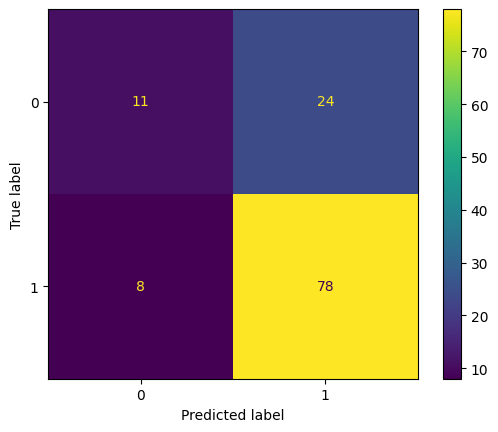

In [22]:
plot_ = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=rf.classes_)

plot_.plot()

This looks pretty underwhelming since most of our data has been labeled as 1! Let's check the precision, recall, and f1 scores.

### Precision, Recall, and F<sub>1</sub> scores for the "1" label

In [23]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [24]:
precision_score(y_test, predictions)

0.7647058823529411

In [25]:
recall_score(y_test, predictions)

0.9069767441860465

In [26]:
f1_score(y_test, predictions)

0.8297872340425532

### Precision, Recall, and F<sub>1</sub> scores for the "0" label

In [27]:
precision_score(y_test, predictions, pos_label=0)

0.5789473684210527

In [28]:
recall_score(y_test, predictions, pos_label=0)

0.3142857142857143

In [29]:
f1_score(y_test, predictions, pos_label=0)

0.40740740740740744

As we can see, the results for our negative label are horrible, and we should certainly do something about this. Because in its current state, our classifier is pretty useless.

### How can we improve the performance of our machine learning model?

1. Initially, we should **annotate more data** while paying attention to the annotation quality, such as ambiguous cases or incorrect annotations. Working in teams can also be beneficial. Additionally, we should reconsider binary classification: is it sensible in light of the data? Or should we include additional classes for more refined annotations?
2. We can explore alternative machine learning algorithms. Perhaps random forests are unsuitable, and we should consider k-nearest neighbors or a naive Bayesian classifier?
3. We can employ cross-validation to gain a better understanding of how our model performs when trained on various combinations of our training set.
4. We could begin with hyper-parameter tuning. This entails testing various values for both the vectorizer and the ML algorithm while constructing/training our `TfidfVectorizer()` and `RandomForests()` model. We will accomplish this using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV), which is a relatively advanced technique, but it is also feasible to manually experiment with different combinations of arguments passed to the individual models.

## Cross validation

Cross-validation is a resampling procedure used to evaluate the performance of machine learning models. It works by dividing the data into a number of folds (also called splits), and then training the model on one fold and evaluating it on the remaining folds. This process is repeated for each fold, and the model is trained and evaluated multiple times. The final performance metric is then calculated as the average performance across all folds.

![Source: https://scikit-learn.org/stable/_images/grid_search_cross_validation.png](grid_search_cross_validation.png)

In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluate the classifier using cross-validation
scores = cross_val_score(rf, X_train, y_train, cv=5)

# Print the average accuracy and standard deviation
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

## *Advanced*: Hyper-Parameter tuning (random forests)
Please note that you can do the following steps also manually by just trying different arguments. In this part, we will systematically try out different combinations of arguments in order to find the combination that leads to the best performing classifier. To do so, we will create a **pipeline** first that includes our vectorizer and the random forest classifier.

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

First, we need to renew our `X` and `y` data, because we have decided to work with a pipeline that accepts pure texts (our current `X` variable refers to the tf-idf transformed document vectors).

In [31]:
df = store["df_annotated"]
df = df[df["annotation"] != -1]

X_train, X_test, y_train, y_test = train_test_split(df["clean_text"].to_numpy(), df["annotation"].to_numpy(), test_size=0.2)

Next, we create a pipeline. The advantage of using a pipeline is that we can now directly pass texts to our pipeline, which are first tf-idf transformed and then forwarded as vectors to our machine learning model.

In [32]:
pipeline_rf = make_pipeline(TfidfVectorizer(), RandomForestClassifier())

For the GridSearch, we define a dictionary with all arguments that we would like to try when training our classifier (and when using the `TfidfVectorizer()`). **Important:** This can take a pretty long time, since there are 3 x 3 x 3 x 2 x 3 x 3 x 3 = 1.458 combinations here!

Also note that we are using "balanced_accurary" as a scoring measure instead of "accuracy" because we are interested in a precise labeling of both labels (not only the positive ones).

In [33]:
param_dict = {
    'tfidfvectorizer__max_df': [1.0, 0.5, 0.25],
    'tfidfvectorizer__max_features': [None, 500, 1000],
    'tfidfvectorizer__ngram_range': [(1, 1), (1,2), (1,3)],
    'tfidfvectorizer__stop_words': [None, 'english'],
    'tfidfvectorizer__min_df': [1,2,3],
    'randomforestclassifier__min_samples_leaf': [1,10,25],
    'randomforestclassifier__n_estimators': [100, 150, 200]
}

In [ ]:
# only uncomment this line if you really want to start the GridSearch (which can take 10+ minutes)
#clf = GridSearchCV(pipeline_rf, param_dict, scoring='balanced_accuracy')
# clf.fit(X_train, y_train)

In [34]:
# let's check which model performed best
pd.DataFrame.from_dict(clf.cv_results_).sort_values("mean_test_score", ascending=False).iloc[0]

NameError: name 'clf' is not defined

The best parameter found by `GridSearchCV` are:

```
mean_fit_time                                                                              0.197549
std_fit_time                                                                               0.005809
mean_score_time                                                                            0.012872
std_score_time                                                                             0.000222
param_randomforestclassifier__min_samples_leaf                                                    1
param_randomforestclassifier__n_estimators                                                      200
param_tfidfvectorizer__max_df                                                                   0.5
param_tfidfvectorizer__max_features                                                             500
param_tfidfvectorizer__min_df                                                                     2
param_tfidfvectorizer__ngram_range                                                           (1, 1)
param_tfidfvectorizer__stop_words                                                           english
params                                            {'randomforestclassifier__min_samples_leaf': 1...
split0_test_score                                                                          0.613636
split1_test_score                                                                          0.614685
split2_test_score                                                                           0.68951
split3_test_score                                                                          0.706643
split4_test_score                                                                          0.683636
mean_test_score                                                                            0.661622
std_test_score                                                                             0.039484
rank_test_score                                                                                   1

```

## Save the best model for later use
Since GridSearchCV can take a lot of time, we should save the best estimator found by GridSearch for later use (so that we do not have to redo the search every single time to get the best model). 

In [ ]:
import joblib
import pickle

# save
joblib.dump(clf.best_estimator_, "best_rf.pkl")

In [35]:
import joblib
# load
rf_best = joblib.load("best_rf.pkl")

Let's check the performance of our model found by GridSearch:

## Confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix

# make predictions on the test set
predictions = rf_best.predict(X_test)

# create a confusion matrix
confusion_matrix = confusion_matrix(y_test, predictions)

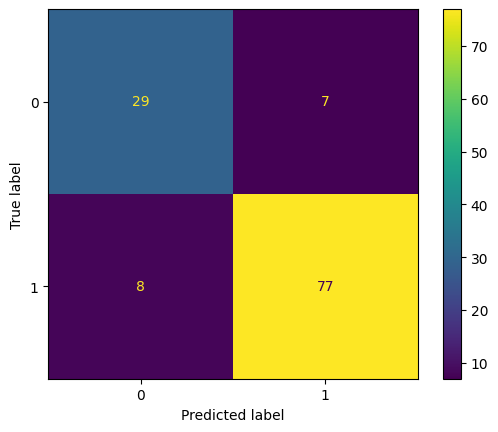

In [37]:
plot_ = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=rf.classes_)

plot_.plot()

## Precision, Recall, and F<sub>1</sub> scores for the "1" label

In [38]:
precision_score(y_test, predictions)

0.9166666666666666

In [39]:
recall_score(y_test, predictions)

0.9058823529411765

In [40]:
f1_score(y_test, predictions)

0.9112426035502958

## Precision, Recall, and F<sub>1</sub> scores for the "0" label

In [41]:
precision_score(y_test, predictions, pos_label=0)

0.7837837837837838

In [42]:
recall_score(y_test, predictions, pos_label=0)

0.8055555555555556

In [43]:
f1_score(y_test, predictions, pos_label=0)

0.7945205479452055

This looks much better! Even though the scores are still far from perfect, tuning the hyper-parameters certainly helped a great deal in increasing its overall performance (we increased the f1 score of our negative labels from 0.36 to 0.86!!!).

# Hands-On: Training a KNN classifier
In this part, it is up to you to train your own KNN classifier.